In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data[50:54]

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3]])

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Create Dataframe from iris feature data with column name
df = pd.DataFrame(iris.data, columns=['sepal_l', 'sepal_w', 'petal_l', 'petal_w'])
df.head()

,sepal_l,sepal_w,petal_l,petal_w
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# check if there are Nan value in dataframe of iris data
# df.info() is good alternative

df.notnull().sum()

sepal_l    150
sepal_w    150
petal_l    150
petal_w    150
dtype: int64

In [9]:
# display statisc data (mean, std, min, max ...) of dataframe
df.describe()
# mean(), std(), min(), max() function returns each value

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# prediction: assume that we already found proper a0, a1, a2 by fitting
#predict(x1,x2) = a0 + a1*x1 + a2*x2  = (a1*x1+a0_1) + (a2*x2+a0_2),  a0_1 + a0_2 = a0

In [11]:
# concatenate or merge target data to a new column (same result)
df2 = pd.concat([df, pd.DataFrame(iris.target, columns='target')], axis=1)
#df2 = df.merge(pd.DataFrame(iris.target, columns=['target']),left_index=True, right_index=True)
df2.head()

,sepal_l,sepal_w,petal_l,petal_w,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# Select target:0 and crete new dataframe
# step-1, retrieve target column as a series
#df2['target']
# another syntax
df2.target

# step-2, perfrom logical operation on the series, result: series of logical value
df2['target'] == 0

# step-3, use above array of logical value to select records(row)
iris0 = df2[df2.target==0]
iris1 = df2[df2.target==1]
iris2 = df2[df2.target==2]

In [13]:
iris0.describe()

,sepal_l,sepal_w,petal_l,petal_w,target
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


In [14]:
iris1.describe()

,sepal_l,sepal_w,petal_l,petal_w,target
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


In [15]:
iris2.describe()

,sepal_l,sepal_w,petal_l,petal_w,target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


In [41]:
# by groupby method, above comparison can be showen in 1 statement
df2.groupby('target').describe().T  # .T for toggle output direction

target                 0          1          2
petal_l count  50.000000  50.000000  50.000000
        mean    1.462000   4.260000   5.552000
        std     0.173664   0.469911   0.551895
        min     1.000000   3.000000   4.500000
        25%     1.400000   4.000000   5.100000
        50%     1.500000   4.350000   5.550000
        75%     1.575000   4.600000   5.875000
        max     1.900000   5.100000   6.900000
petal_w count  50.000000  50.000000  50.000000
        mean    0.246000   1.326000   2.026000
        std     0.105386   0.197753   0.274650
        min     0.100000   1.000000   1.400000
        25%     0.200000   1.200000   1.800000
        50%     0.200000   1.300000   2.000000
        75%     0.300000   1.500000   2.300000
        max     0.600000   1.800000   2.500000
sepal_l count  50.000000  50.000000  50.000000
        mean    5.006000   5.936000   6.588000
        std     0.352490   0.516171   0.635880
        min     4.300000   4.900000   4.900000
        25%     4.800000   5.600000   6.225000
        50%     5.000000   5.900000   6.500000
        75%     5.200000   6.300000   6.900000
        max     5.800000   7.000000   7.900000
sepal_w count  50.000000  50.000000  50.000000
        mean    3.428000   2.770000   2.974000
        std     0.379064   0.313798   0.322497
        min     2.300000   2.000000   2.200000
        25%     3.200000   2.525000   2.800000
        50%     3.400000   2.800000   3.000000
        75%     3.675000   3.000000   3.175000
        max     4.400000   3.400000   3.800000

In [16]:
# splitting training and testing data using random permutation
# 50 for testing, 100 for training

rnd_index = np.random.permutation(150)
test_idx = rnd_index[:50]
train_idx = rnd_index[50:]
# print(train_idx, test_idx)

# select data using iloc method
X_test = df.iloc[test_idx]
X_train = df.iloc[train_idx]

#X_test.describe()
#X_train.describe()

# define DataFrame of LABEL
df_target = pd.DataFrame(iris.target, columns=['target'])

# we can use same index for y (LABEL) ; expected result
y_test = df_target.iloc[test_idx]
y_train = df_target.iloc[train_idx]

y_test.head()

,target
144,2
39,0
57,1
119,2
49,0


In [17]:
X_test.head()

,sepal_l,sepal_w,petal_l,petal_w
144,6.7,3.3,5.7,2.5
39,5.1,3.4,1.5,0.2
57,4.9,2.4,3.3,1.0
119,6.0,2.2,5.0,1.5
49,5.0,3.3,1.4,0.2


In [18]:
# Split data with sklearn test_data_split
from sklearn.model_selection import train_test_split

# train:test = 70:30 - 80:20
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)

In [19]:
# It's possible to use pandas DF as input data
#ser_target = pd.Series(iris.target)
#from sklearn.utils.validation import column_or_1d
#X_train, X_test, y_train, y_test = train_test_split(df, ser_target, test_size=0.2)
# or use df.values attribute which is numpy array of the data of DataFrame
#X_train, X_test, y_train, y_test = train_test_split(df.values, ser_target.values, test_size=0.25)

In [20]:
print('Size of training:', len(X_train), len(y_train), '  Size of testing:', len(X_test), len(y_test))

Size of training: 90 90   Size of testing: 60 60


In [21]:
# apply logistic regression

from sklearn.linear_model import LogisticRegression # We can choose other algorithm easily
clf = LogisticRegression() # We can override parameter
from sklearn.linear_model import LogisticRegressionCV # We can choose other algorithm easily
#clf = LogisticRegressionCV(Cs=[0.1, 1, 10, 100,1000], solver='newton-cg', max_iter=10000) # We can override parameters
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
#clf = KNeighborsClassifier()
from sklearn.neural_network import MLPClassifier
#clf = MLPClassifier()
from sklearn.svm import SVC
#clf = SVC()

clf.fit(X_train, y_train)  # fit model: adjust parameter
#svc.fit(X_train, y_train)  # fit model: adjust parameter

# measure the accuracy on testing data
p_test = clf.predict(X_test)
#p_svc = clf.predict(X_test)
print('Predicted', p_test)
print('Expected ', y_test)
#print('Pred SVC', p_svc)


clf  # check which parameter can be specified

Predicted [2 2 2 1 1 2 1 2 2 2 2 1 2 1 1 2 0 1 2 2 0 0 1 2 0 0 0 2 1 1 2 1 0 0 1 0 1
 0 2 1 0 2 1 2 2 0 1 0 1 2 2 0 2 2 2 1 0 2 0 1]
Expected  [2 2 2 1 1 2 1 2 2 2 2 1 2 1 1 2 0 1 2 2 0 0 1 2 0 0 0 2 2 1 2 1 0 0 1 0 1
 0 2 1 0 2 1 2 2 0 1 0 1 2 2 0 2 2 2 1 0 2 0 1]


/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
clf.coef_

array([[ 0.32305673,  1.38326769, -2.00106474, -0.95044999],
       [ 0.27082784, -1.36072114,  0.7162746 , -1.15976753],
       [-1.24355629, -1.36541168,  1.78385597,  2.16549054]])

### Algorithm(estimator) choosing guide of scikit-learn

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Accuracy score calculation

In [23]:
# Calculate accuracy of predicted testing data. (accuracy: number_of_correct_answer/number_of_testing_data)

match_count = 0
for i in range(len(p_test)):  #loop from 0 to 30-1 (total 30 loop)
    if p_test[i] == y_test[i]:
        match_count += 1
print(match_count / len(p_test))

0.9833333333333333


In [24]:
(y_test == p_test).mean()

0.9833333333333333

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, p_test)

0.9833333333333333

In [26]:
# Calculate accuracy of predicted training data
p_train = clf.predict(X_train)
(y_train == p_train).mean()

0.9333333333333333

# Learning Curve and Cross Validation

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
https://scikit-learn.org/stable/modules/cross_validation.html

See also Corsera machine learning, lecture-10.

In [27]:
# Separate Training data to Training + Cross Validation
# Train: CV: Testing = 60:20:20
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.25)
train_size = list(range(len(y_tr) // 10, len(y_tr) + 1, len(y_tr) // 10))
train_score = list()
cv_score = list()

for t_size in train_size:
    #print('fitting with training size:', t_size)
    clf.fit(X_tr[:t_size], y_tr[:t_size])
    p_tr = clf.predict(X_tr[:t_size])
    p_cv = clf.predict(X_cv)
    train_score.append(round((y_tr[:t_size] == p_tr).mean(), 3))
    cv_score.append(round((y_cv == p_cv).mean(), 3))
    #print('Trainign score:', round((y_tr == p_tr).mean(),3), end='  ')
    #print('CV score:', round((y_cv == p_cv).mean(),3))

/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

In [28]:
# Modified version, test 10 times
# Separate Training data to Training + Cross Validation
# Train: CV: Testing = 60:20:20
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.25)
train_size = list(range(len(y_tr) // 10, len(y_tr) + 1, len(y_tr) // 10))
train_score = list()
cv_score = list()

for t_size in train_size:
    #print('fitting with training size:', t_size)
    tr_result = list()
    cv_result = list()
    for i in range(1):
        clf.fit(X_tr[:t_size], y_tr[:t_size])
        p_tr = clf.predict(X_tr)
        p_cv = clf.predict(X_cv)
        tr_result.append((y_tr == p_tr).mean())
        cv_result.append((y_cv == p_cv).mean())
    train_score.append(round(np.mean(tr_result), 3))
    cv_score.append(round(np.mean(tr_result) , 3))
    #print('Trainign score:', round((y_tr == p_tr).mean(),3), end='  ')
    #print('CV score:', round((y_cv == p_cv).mean(),3))

/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

In [29]:
train_size

[6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66]

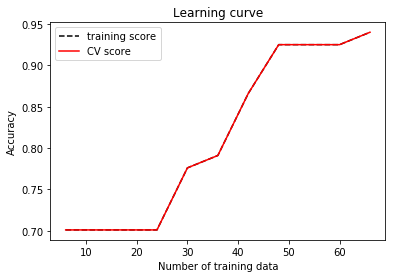

In [45]:
# plot learning curve
#plt.hold(True)
plt.figure()
plt.title('Learning curve')
plt.xlabel('Number of training data')
plt.ylabel('Accuracy')
plt.plot(train_size, train_score, 'k--', label='training score')
plt.plot(train_size, cv_score, 'r-', label='CV score')
plt.legend(loc='best')
plt.show()

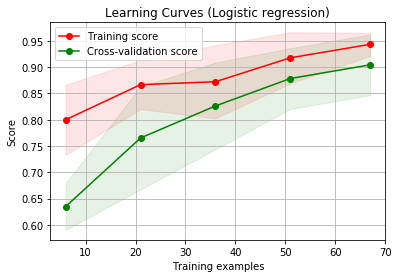

In [31]:
# Learning curve using the sample of scikit-learn
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Logistic regression)"
# cv = ShuffleSplit(n_splits=2, test_size=0.25, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.25)
plot_learning_curve(clf, title, X_train, y_train, cv=cv, n_jobs=4)

plt.show()

## Add new future using pandas DataFrame

1. ratio of petal length and petal width (petal_l / petal_w)
2. ratio of sepal length and sepal width (sepal_l / sepal_w)
3. and more...

In [49]:
df['petal_w2'] = df['petal_w'] * df['petal_w']
df['sepal_r'] = df['sepal_l'] / df['sepal_w']
df['petal_r'] = df['petal_l'] / df['petal_w']
df['petal_r2'] = df['petal_r'] * df['petal_r']
df['sepal_size'] = df['sepal_l'] * df['sepal_w']
df['petal_size'] = df['petal_l'] * df['petal_w']
df['size_ratio'] = df['sepal_size'] / df['petal_size']
df['sepal2'] = df['sepal_l'] * 2  # non-sense to add constant * original data
#df['ratio_ratio'] = df['sepal_r'] / df['petal_r']
print(df[40:45], '\n\n')
print(df[70:75], '\n\n')
print(df[115:120])

    sepal_l  sepal_w  petal_l  petal_w  petal_w2   sepal_r   petal_r  \
40      5.0      3.5      1.3      0.3      0.09  1.428571  4.333333   
41      4.5      2.3      1.3      0.3      0.09  1.956522  4.333333   
42      4.4      3.2      1.3      0.2      0.04  1.375000  6.500000   
43      5.0      3.5      1.6      0.6      0.36  1.428571  2.666667   
44      5.1      3.8      1.9      0.4      0.16  1.342105  4.750000   

     petal_r2  sepal_size  petal_size  size_ratio  sepal2  
40  18.777778       17.50        0.39   44.871795    10.0  
41  18.777778       10.35        0.39   26.538462     9.0  
42  42.250000       14.08        0.26   54.153846     8.8  
43   7.111111       17.50        0.96   18.229167    10.0  
44  22.562500       19.38        0.76   25.500000    10.2   


    sepal_l  sepal_w  petal_l  petal_w  petal_w2   sepal_r   petal_r  \
70      5.9      3.2      4.8      1.8      3.24  1.843750  2.666667   
71      6.1      2.8      4.0      1.3      1.69  2.178571  

In [33]:
df[:50].describe()

,sepal_l,sepal_w,petal_l,petal_w,petal_w2,sepal_r,petal_r,petal_r2,sepal_size,petal_size,size_ratio,sepal2
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000,0.071400,1.470188,6.908000,55.705922,17.257800,0.365600,56.925120,10.012000
std,0.35249,0.379064,0.173664,0.105386,0.067006,0.118750,2.854545,51.287271,2.933775,0.181155,26.396744,0.704979
min,4.30000,2.300000,1.000000,0.100000,0.010000,1.268293,2.666667,7.111111,10.350000,0.110000,18.229167,8.600000
25%,4.80000,3.200000,1.400000,0.200000,0.040000,1.385684,4.687500,21.973958,15.040000,0.280000,42.477941,9.600000
50%,5.00000,3.400000,1.500000,0.200000,0.040000,1.463063,7.000000,49.000000,17.170000,0.300000,51.750000,10.000000
75%,5.20000,3.675000,1.575000,0.300000,0.090000,1.541444,7.500000,56.250000,19.155000,0.420000,64.151786,10.400000
max,5.80000,4.400000,1.900000,0.600000,0.360000,1.956522,15.000000,225.000000,25.080000,0.960000,142.133333,11.600000


In [34]:
df[50:100].describe()

,sepal_l,sepal_w,petal_l,petal_w,petal_w2,sepal_r,petal_r,petal_r2,sepal_size,petal_size,size_ratio,sepal2
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000,1.796600,2.160402,3.242837,10.611668,16.526200,5.720400,2.970577,11.872000
std,0.516171,0.313798,0.469911,0.197753,0.525429,0.228658,0.312456,2.085571,2.866882,1.368403,0.478105,1.032342
min,4.900000,2.000000,3.000000,1.000000,1.000000,1.764706,2.666667,7.111111,10.000000,3.300000,1.985294,9.800000
25%,5.600000,2.525000,4.000000,1.200000,1.440000,2.033929,3.016667,9.101111,14.347500,4.860000,2.655286,11.200000
50%,5.900000,2.800000,4.350000,1.300000,1.690000,2.161290,3.240385,10.500185,16.385000,5.615000,2.970235,11.800000
75%,6.300000,3.000000,4.600000,1.500000,2.250000,2.232692,3.417582,11.680232,18.495000,6.750000,3.296154,12.600000
max,7.000000,3.400000,5.100000,1.800000,3.240000,2.818182,4.100000,16.810000,22.400000,8.640000,4.234286,14.000000


In [35]:
df[100:].describe()

,sepal_l,sepal_w,petal_l,petal_w,petal_w2,sepal_r,petal_r,petal_r2,sepal_size,petal_size,size_ratio,sepal2
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6.58800,2.974000,5.552000,2.02600,4.178600,2.230453,2.780662,7.894712,19.684600,11.296200,1.765114,13.176000
std,0.63588,0.322497,0.551895,0.27465,1.106843,0.246992,0.407367,2.404283,3.458783,2.157412,0.248194,1.271759
min,4.90000,2.200000,4.500000,1.40000,1.960000,1.823529,2.125000,4.515625,12.250000,7.500000,1.261500,9.800000
25%,6.22500,2.800000,5.100000,1.80000,3.240000,2.031771,2.511364,6.307335,17.430000,9.717500,1.603754,12.450000
50%,6.50000,3.000000,5.550000,2.00000,4.000000,2.169540,2.666667,7.111111,20.060000,11.445000,1.707830,13.000000
75%,6.90000,3.175000,5.875000,2.30000,5.290000,2.342949,3.055556,9.336420,21.412500,12.790000,1.928455,13.800000
max,7.90000,3.800000,6.900000,2.50000,6.250000,2.961538,4.000000,16.000000,30.020000,15.870000,2.345312,15.800000


In [36]:
features = ['petal_r', 'sepal_r', 'sepal_size', 'petal_size', 'size_ratio']
features = ['sepal_w', 'petal_l', 'petal_w', 'petal_w2', 'petal_r', 'sepal_r', 'size_ratio']
dfx = df[features]
dfx.head()

,sepal_w,petal_l,petal_w,petal_w2,petal_r,sepal_r,size_ratio
0,3.5,1.4,0.2,0.04,7.0,1.457143,63.750000
1,3.0,1.4,0.2,0.04,7.0,1.633333,52.500000
2,3.2,1.3,0.2,0.04,6.5,1.468750,57.846154
3,3.1,1.5,0.2,0.04,7.5,1.483871,47.533333
4,3.6,1.4,0.2,0.04,7.0,1.388889,64.285714


In [37]:
# Normalize dfx, its data range is very diffrent between columns
# same operation can be performed using sklearn preprocessing (StandardScaler)

#dfn = (dfx - dfx.min() + 0.0000001) / (dfx.max() - dfx.min())
#dfn = (df - df.min() + 0.0000001) / (df.max() - df.min())
dfn = (dfx - dfx.mean()) / dfx.std()
dfn.describe()  # Mean:0 Std:1

,sepal_w,petal_l,petal_w,petal_w2,petal_r,sepal_r,size_ratio
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000,1.500000e+02,1.500000e+02
mean,-1.823726e-15,-1.515825e-15,-8.526513e-16,-1.421085e-16,0.000000,6.158037e-16,-6.631732e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-2.425820e+00,-1.562342e+00,-1.442245e+00,-1.095795e+00,-0.877835,-1.711416e+00,-6.447317e-01
25%,-5.903951e-01,-1.222456e+00,-1.179859e+00,-1.052084e+00,-0.605756,-1.017511e+00,-6.220949e-01
50%,-1.315388e-01,3.353541e-01,1.320673e-01,-1.778668e-01,-0.405881,1.962913e-01,-5.876267e-01
75%,5.567457e-01,7.602115e-01,7.880307e-01,6.690312e-01,0.143059,6.772607e-01,7.268511e-01
max,3.080455e+00,1.779869e+00,1.706379e+00,2.313652e+00,4.293579,2.516623e+00,4.063129e+00


In [38]:
def test_n_time(clf, n, test_ratio = 0.3, normalize=True):
    cum_acc = []
    if normalize: dataframe = dfn
    else: dataframe = df
        
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(dataframe, iris.target, test_size=test_ratio)
        #clf = LogisticRegression() # We can override parameter
        #clf = SVC()
        #clf = KNeighborsClassifier()

        clf.fit(X_train, y_train)  # fit model: adjust parameter
        # measure the accuracy on testing data
        p_test = clf.predict(X_test)
        #print('Predict ', p_test)
        #print('Expected', y_test)
        accuracy = (y_test == p_test).mean()
        #print(accuracy)
        cum_acc.append(accuracy)
        #print(list(X_test.index[y_test != p_test]))
    return cum_acc

In [39]:
#clf = LogisticRegression()
#clf = KNeighborsClassifier()
clf = SVC()
test_count = 150
result = test_n_time(clf, test_count)
print('Average accuracy of', test_count, 'time:', sum(result) / test_count)
#print(result)
print('min:', min(result), 'max:' ,max(result), 'std:', np.std(result))

/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/

/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/

/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/

Average accuracy of 150 time: 0.9589629629629616
min: 0.8888888888888888 max: 1.0 std: 0.025367964200576985


/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/

### predict_proba function

Most(?) classification estimaters have predict_proba() function, which returns probability of each result. It can be usuful to debug and enhance your model.

In [40]:
## Show probalirity of each records
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1)
clf.fit(X_train, y_train)
prob_lr = clf.predict_proba(X_test)
p_test_lr = clf.predict(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prob_rf = clf.predict_proba(X_test)
p_test_rf = clf.predict(X_test)

for i in range(30):
    print(prob_lr[i], prob_rf[i], p_test_lr[i], p_test_rf[i], y_test[i])

/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kato/Miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[9.1895303e-01 8.1042947e-02 4.0229155e-06] [1. 0. 0.] 0 0 0
[0.27908676 0.64263957 0.07827366] [0. 1. 0.] 1 1 1
[0.04573536 0.77798741 0.17627723] [0. 1. 0.] 1 1 1
[9.36022243e-01 6.39592703e-02 1.84863439e-05] [1. 0. 0.] 0 0 0
[0.00099059 0.28550713 0.71350228] [0. 0. 1.] 2 2 2
[0.02665822 0.42792309 0.54541868] [0.  0.9 0.1] 2 1 1
[0.00313606 0.2490316  0.74783234] [0.  0.1 0.9] 2 2 2
[9.23335772e-01 7.65145826e-02 1.49645907e-04] [1. 0. 0.] 0 0 0
[8.42507830e-01 1.57321105e-01 1.71064749e-04] [1. 0. 0.] 0 0 0
[7.92074283e-04 2.02768029e-01 7.96439897e-01] [0. 0. 1.] 2 2 2
[0.02552453 0.55409811 0.42037736] [0. 1. 0.] 1 1 1
[9.27733238e-01 7.22186571e-02 4.81046596e-05] [1. 0. 0.] 0 0 0
[4.52276782e-04 3.06003382e-01 6.93544341e-01] [0. 0. 1.] 2 2 2
[0.04676771 0.61219992 0.34103238] [0. 1. 0.] 1 1 1
[0.01737769 0.48368643 0.49893588] [0. 1. 0.] 2 1 1
[8.74314068e-01 1.25541346e-01 1.44585504e-04] [1. 0. 0.] 0 0 0
[0.04400906 0.74083983 0.21515111] [0. 1. 0.] 1 1 1
[0.01562724 0.326